In [72]:
import os
import pickle as pkl
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from statistics import mean

from scipy.spatial.transform import Rotation as R
from keypoint_util import KeypointSelector
from trajectory_util import *

def ellipse(mean, cov, dim0, dim1, ax, n_std=1, facecolor='none', **kwargs):
    pearson = cov[dim0, dim1]/np.sqrt(cov[dim0, dim0] * cov[dim1, dim1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[dim0, dim0]) * n_std
    mean_x = mean[dim0]

    # calculating the standard deviation of y.
    scale_y = np.sqrt(cov[dim1, dim1]) * n_std
    mean_y = mean[dim1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

folder = '2022-04-13-morning'
instances = sorted(os.listdir(folder))
all_dfs = []
for i,instance in enumerate(instances):
    if i not in [0,2,8]:
        instance_folder = os.path.join(folder, instance)
        file_set = sorted(os.listdir(instance_folder))[:2]
        file1, file2 = file_set
        # with open(os.path.join(data_folder, data497, 'labeled_actions_new.pkl'), 'rb') as f:
        #     label_actions = pkl.load(f)
        # trajectory_file = os.path.join(data_folder, data497, 'obj_pose_trajectory_interpolated_median.h5')
        # trajectory_dataset = pd.read_hdf(trajectory_file)
        grip_file = os.path.join(instance_folder, file1)
        state_file = os.path.join(instance_folder, file2)
        grip_states = pd.read_csv(grip_file)
        pos_states = pd.read_csv(state_file, index_col='Unnamed: 0')
        dframe = attach_grip_states(pos_states, grip_states)
        print(grip_file)
        all_dfs.append(dframe)

2022-04-13-morning/816303/816303-2022-04-13-15-58-16-Servo-displacement_postprocessed
2022-04-13-morning/838540/838540-2022-04-13-14-54-00-Servo-displacement_postprocessed
2022-04-13-morning/838542/838542-2022-04-13-15-07-54-Servo-displacement_postprocessed
2022-04-13-morning/838544/838544-2022-04-13-15-12-01-Servo-displacement_postprocessed
2022-04-13-morning/838545/838545-2022-04-13-15-15-06-Servo-displacement_postprocessed
2022-04-13-morning/838546/838546-2022-04-13-15-17-44-Servo-displacement_postprocessed


In [73]:
# For drawing axis
# for df in all_dfs:
#     xax = [1,0,0]
#     r = R.from_rotvec(df.loc[:,['Rx', 'Ry', 'Rz']])
#     df.loc[:, ['xu','xv','xw']] = r.apply(xax)

# Setup key point search parameters (used for picking out task interval in this case).
selector = KeypointSelector(16, 8, 0.07, 0.05, rotation_max=.7, 
                            velocity_window_size=5, rotation_window_size=5)

In [74]:
task_dfs = []
for f, df in enumerate(all_dfs):
    cond_df, keypoints, vel_df, rot_df = selector.search(all_dfs[f])
    grasp_indices = cond_df.index[cond_df['condition']=='grasp'].tolist()
    task_intervals = [grasp_indices[i*2:i*2+2] for i in range(int(len(grasp_indices)/2))]

    # 0: teabag to cup
    # 1: pitcher to tap
    # 2: turn tap
    # 3: wait
    # 4: turn tap back
    # 5: pour pitcher to cup
    # Slice out task demonstration.
    start, end = task_intervals[1]
    save_df = cond_df.iloc[start:end].copy().reset_index(drop=True)
    task_dfs.append(save_df)

# # Uniformly downsample longer demonstrations (comment out to remove normalization).
# min_df_len = min([len(df) for df in task_dfs])
# for i in range(len(task_dfs)):
#     select_index = [int(len(task_dfs[i])*j/min_df_len) for j in range(min_df_len)]
#     task_dfs[i] = task_dfs[i].iloc[select_index]

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:96: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.

/home/luke/Desktop/project/make_tea/keypoint_heuristics/keypoint_util.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# interval between gaussian fitting
interval_size = 5
demo_start_pts, demo_end_pts = [], []
task_start_dfs, task_end_dfs = [], []
n_train = 5
for df in task_dfs:
    start_pt = df[['x','y','z']].iloc[0].tolist()
    end_pt = df[['x','y','z']].iloc[-1].tolist()
    demo_start_pts.append(start_pt)
    demo_end_pts.append(end_pt)
    task_start_dfs.append((df[['x','y','z']] - start_pt))
    task_end_dfs.append((df[['x','y','z']] - end_pt))

# pickout every interval 
start_checkpts, snum_act_demos = extract_points(task_start_dfs[:n_train], interval_size=interval_size)
end_checkpts, enum_act_demos = extract_points(task_end_dfs[:n_train], interval_size=interval_size, backward=True)

# get mean and covariance matrices
start_mean, start_cov = get_mean_cov(start_checkpts, shrink=False)
end_mean, end_cov = get_mean_cov(end_checkpts, shrink=True)

In [92]:
end_cov

[array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[ 32.08626933,   5.69331341, -17.28378748],
        [  5.69331341,  22.44532025, -13.43754511],
        [-17.28378748, -13.43754511,  17.33610669]]),
 array([[149.39700958,  24.59204516, -59.13305762],
        [ 24.59204516,  26.38501195, -28.43074626],
        [-59.13305762, -28.43074626,  52.39083178]]),
 array([[100.37477136,  29.68394283, -65.95478609],
        [ 29.68394283,  25.19633613, -33.13868769],
        [-65.95478609, -33.13868769,  79.40902401]]),
 array([[284.9273379 ,  19.29945936, -48.44542573],
        [ 19.29945936,  16.4145506 , -24.1914493 ],
        [-48.44542573, -24.1914493 ,  58.11376632]]),
 array([[ 413.14510408,   63.29491132, -233.99411449],
        [  63.29491132,   35.13532708,  -75.65231747],
        [-233.99411449,  -75.65231747,  216.74086021]]),
 array([[ 568.02220006,  169.65448983, -362.50288972],
        [ 169.65448983,  159.62221284, -202.85637835],
        [-362.50288972,

In [93]:
# Extrapolate forward and backward
n_demo = max(snum_act_demos)
multipliers = []
for s, num in enumerate(snum_act_demos):
    if num < n_demo:
        scaling = mean(multipliers) - 1
        dim = start_cov[s].shape[1]
        start_cov[s] = start_cov[s-1] + np.diag(np.full(dim, scaling*np.trace(start_cov[s-1])/dim))
    elif s > 0: 
        multipliers.append(np.trace(start_cov[s])/np.trace(start_cov[s-1]))

multipliers = []     
for s, num in enumerate(enum_act_demos):
    if num < n_demo:
        scaling = mean(multipliers) - 1
        dim = end_cov[s].shape[1]
        end_cov[s] = end_cov[s-1] + np.diag(np.full(dim, scaling*np.trace(end_cov[s-1])/dim))
    elif s > 0: multipliers.append(np.trace(end_cov[s])/np.trace(end_cov[s-1]))
# end_cov.reverse()
# end_mean.reverse()

In [94]:
end_cov


[array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[ 32.08626933,   5.69331341, -17.28378748],
        [  5.69331341,  22.44532025, -13.43754511],
        [-17.28378748, -13.43754511,  17.33610669]]),
 array([[149.39700958,  24.59204516, -59.13305762],
        [ 24.59204516,  26.38501195, -28.43074626],
        [-59.13305762, -28.43074626,  52.39083178]]),
 array([[100.37477136,  29.68394283, -65.95478609],
        [ 29.68394283,  25.19633613, -33.13868769],
        [-65.95478609, -33.13868769,  79.40902401]]),
 array([[284.9273379 ,  19.29945936, -48.44542573],
        [ 19.29945936,  16.4145506 , -24.1914493 ],
        [-48.44542573, -24.1914493 ,  58.11376632]]),
 array([[ 413.14510408,   63.29491132, -233.99411449],
        [  63.29491132,   35.13532708,  -75.65231747],
        [-233.99411449,  -75.65231747,  216.74086021]]),
 array([[ 568.02220006,  169.65448983, -362.50288972],
        [ 169.65448983,  159.62221284, -202.85637835],
        [-362.50288972,

In [83]:
# demo trajectory from starting reference point
demo_data = []
for df in task_start_dfs:
    fig_line = px.line_3d(df, x='x', y='y', z='z')
    demo_data.append(fig_line.data)
start_mean_df = pd.DataFrame(start_mean, columns=['x', 'y', 'z'])
    
data_cat = demo_data[0]

for i in range(1, len(demo_data)):
    data_cat = data_cat + demo_data[i]
fig_main= go.Figure(data=data_cat)
fig_main.update_traces(marker=dict(size=5))
fig_main.show()

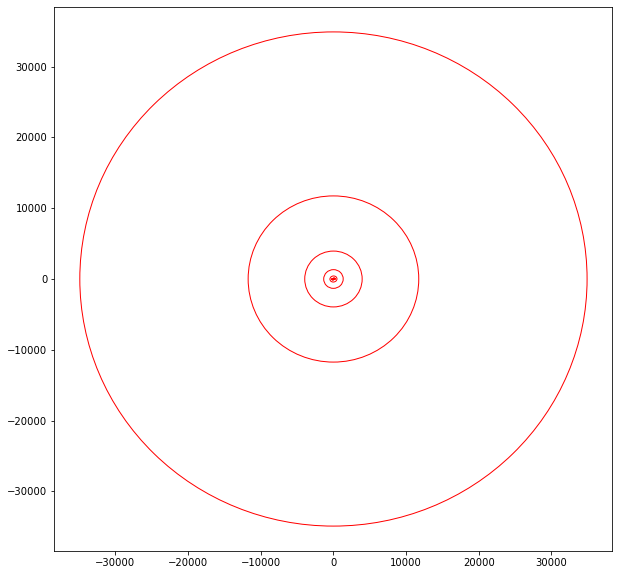

In [84]:
# Covariance matrix change over time on z/y-axis.
fig, ax0 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax0.plot(0,0, color='blue', linestyle="dashed", alpha=0.2)
for c in start_cov:
    ellipse([0,0,0], c, 2, 1, ax0, n_std=1, edgecolor='red')
plt.show()

(5, 3)


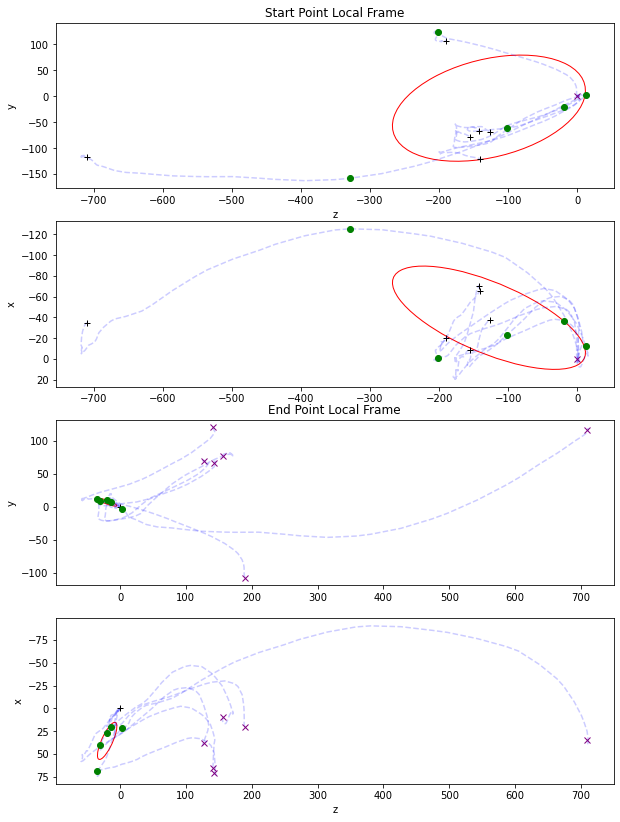

In [100]:
def plot_start_end(frame, n):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
    fig.set_figheight(14)
    fig.set_figwidth(10)

    # start point view
    cur_pts_start = start_checkpts[frame]
    print(cur_pts_start.shape)

    for df in task_start_dfs: 
        ax1.plot(df['z'],df['y'], color='blue', linestyle="dashed", alpha=0.2)
        ax1.plot(df['z'].iloc[-1], df['y'].iloc[-1],'+', color='black')
    ax1.plot(df['z'].iloc[0], df['y'].iloc[0],'x', color='purple')
    ax1.plot(cur_pts_start[:,2], cur_pts_start[:,1],'o', color='green')
    ellipse(start_mean[frame], start_cov[frame], 2, 1, ax1, n_std=n, edgecolor='red')
    ax1.set_title('Start Point Local Frame')
    ax1.set_xlabel('z')
    ax1.set_ylabel('y')

    for df in task_start_dfs: 
        ax2.plot(df['z'],df['x'], color='blue', linestyle="dashed", alpha=0.2)
        ax2.plot(df['z'].iloc[-1],df['x'].iloc[-1],'+', color='black')
    ax2.plot(df['z'].iloc[0],df['x'].iloc[0],'x', color='purple')
    ax2.plot(cur_pts_start[:,2], cur_pts_start[:,0],'o', color='green')
    ellipse(start_mean[frame], start_cov[frame], 2, 0, ax2, n_std=n, edgecolor='red')
    ax2.set_ylabel('x')
    ax2.invert_yaxis()

    # End point view
    cur_pts_end = end_checkpts[frame]
    
    for df in task_end_dfs: 
        ax3.plot(df['z'],df['y'], color='blue', linestyle="dashed", alpha=0.2)
        ax3.plot(df['z'].iloc[0], df['y'].iloc[0],'x', color='purple')
    ax3.plot(df['z'].iloc[-1], df['y'].iloc[-1],'+', color='black')
    ax3.plot(cur_pts_end[:,2], cur_pts_end[:,1],'o', color='green')
    ellipse(end_mean[frame], end_cov[frame], 2, 1, ax3, n_std=n, edgecolor='red')
    ax3.set_title('End Point Local Frame')
    ax3.set_ylabel('y')

    for df in task_end_dfs: 
        ax4.plot(df['z'],df['x'], color='blue', linestyle="dashed", alpha=0.2)
        ax4.plot(df['z'].iloc[0],df['x'].iloc[0],'x', color='purple')
    ax4.plot(df['z'].iloc[-1],df['x'].iloc[-1],'+', color='black')
    ax4.plot(cur_pts_end[:,2], cur_pts_end[:,0],'o', color='green')
    ellipse(end_mean[frame], end_cov[frame], 2, 0, ax4, n_std=n, edgecolor='red')
    ax4.set_xlabel('z')
    ax4.set_ylabel('x')
    ax4.invert_yaxis()
    plt.show()

frame = 5 # frame number
n_std = 1 # nth standard dev
plot_start_end(frame, n_std)

In [ ]:
end_cov.reverse()

In [114]:
n_gaussians

17

[  148.7425898    121.99832684 -1459.66917334] [106.76691683323762, 49.90864079508296, -1609.6903055193425]


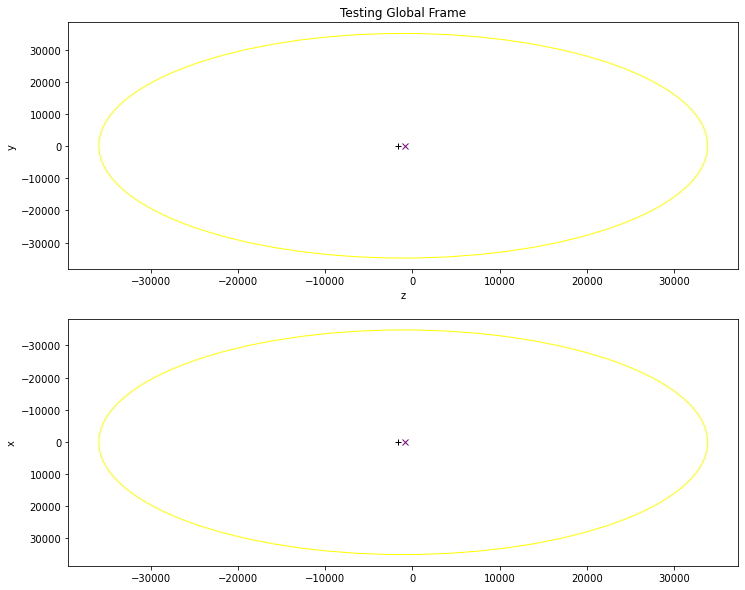

In [133]:
from scipy.stats import multivariate_normal

nth_demo = 4 # demonstration number
frame = 16 # frame number
n_std = 1 # nth standard dev
n_gaussians = len(start_mean)

t_start_pt = demo_start_pts[nth_demo]
t_end_pt = demo_end_pts[nth_demo]
glob_start_mean = [row + t_start_pt for row in start_mean]
glob_end_mean = [row + t_end_pt for row in end_mean]

opt_mean, opt_cov = get_mean_cov_hats([glob_start_mean, glob_end_mean], [start_cov, end_cov]) 
print(opt_mean[-1], demo_end_pts[nth_demo])
# opt_mean, opt_cov = [],[]
# for i in range(n_gaussians):
#     gaussian_start_pdf = multivariate_normal(start_mean[0], start_cov[0])
#     gaussian_end_pdf = multivariate_normal(end_mean[0], end_cov[0])
#     gaussian_opt = gaussian_start_pdf * gaussian_end_pdf
#     print(gaussian_opt)
#     raise

fig, (ax5, ax6) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)

# plot gaussian product
cur_pts_start = start_checkpts[frame]
ax5.plot(t_end_pt[2], t_end_pt[1],'+', color='black')
ax5.plot(t_start_pt[2], t_start_pt[1],'x', color='purple')
ellipse(glob_start_mean[frame], start_cov[frame], 2, 1, ax5, n_std=n_std, edgecolor='yellow')
ellipse(glob_end_mean[frame], end_cov[frame], 2, 1, ax5, n_std=n_std, edgecolor='orange')
ellipse(opt_mean[frame], opt_cov[frame], 2, 1, ax5, n_std=n_std, edgecolor='red', facecolor='red', alpha=.5)
ax5.set_title('Testing Global Frame')
ax5.set_xlabel('z')
ax5.set_ylabel('y')

ax6.plot(t_end_pt[2], t_end_pt[0],'+', color='black')
ax6.plot(t_start_pt[2], t_start_pt[0],'x', color='purple')
ellipse(glob_start_mean[frame], start_cov[frame], 2, 0, ax6, n_std=n_std, edgecolor='yellow')
ellipse(glob_end_mean[frame], end_cov[frame], 2, 0, ax6, n_std=n_std, edgecolor='orange')
ellipse(opt_mean[frame], opt_cov[frame], 2, 0, ax6, n_std=n_std, edgecolor='red', facecolor='red', alpha=.5)
ax6.set_ylabel('x')
ax6.invert_yaxis()

Euclidean distance between start and end: 719.6415901973174


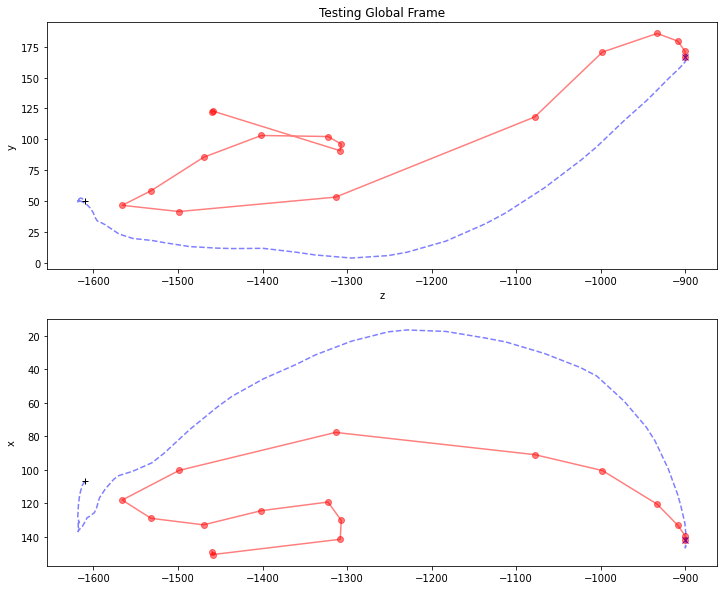

In [128]:
# Demonstration(blue) vs combine Gaussian product trajectory(red).
print('Euclidean distance between start and end:', 
      sum((t_start_pt[i] - t_end_pt[i])**2 for i in range(len(t_start_pt)))**.5)
fig, (ax7, ax8) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)

ax7.plot(task_dfs[nth_demo]['z'],task_dfs[nth_demo]['y'], color='blue', linestyle="dashed", alpha=0.5)
ax7.plot(opt_mean[:,2], opt_mean[:,1], color='red', alpha=0.5)
ax7.scatter(opt_mean[:,2], opt_mean[:,1], color='red', alpha=0.5)
ax7.plot(t_end_pt[2], t_end_pt[1],'+', color='black')
ax7.plot(t_start_pt[2], t_start_pt[1],'x', color='purple')
ax7.set_title('Testing Global Frame')
ax7.set_xlabel('z')
ax7.set_ylabel('y')

ax8.plot(task_dfs[nth_demo]['z'],task_dfs[nth_demo]['x'], color='blue', linestyle="dashed", alpha=0.5)
ax8.plot(opt_mean[:,2], opt_mean[:,0], color='red', alpha=0.5)
ax8.scatter(opt_mean[:,2], opt_mean[:,0], color='red', alpha=0.5)
ax8.plot(t_end_pt[2], t_end_pt[0],'+', color='black')
ax8.plot(t_start_pt[2], t_start_pt[0],'x', color='purple')
ax8.set_ylabel('x')
ax8.invert_yaxis()

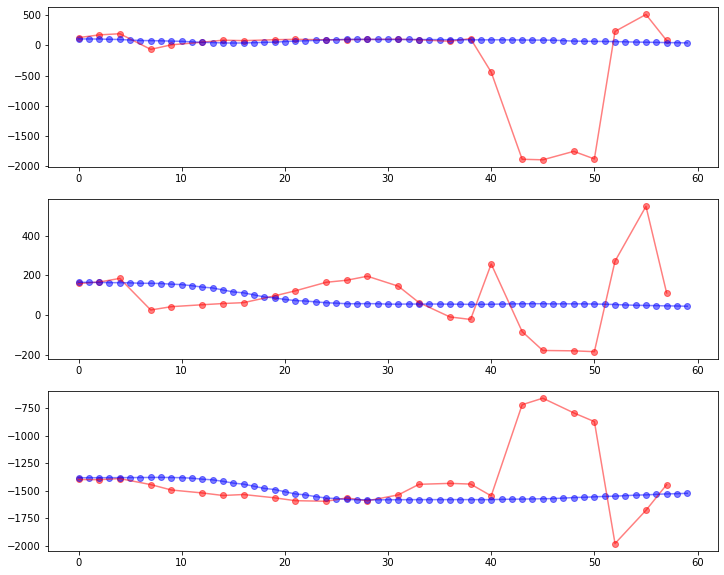

In [60]:
fig, (ax9, ax10, ax11) = plt.subplots(3)
fig.set_figheight(10)
fig.set_figwidth(12)

# xyz coordinate vs time/period.
demo_index = range(len(task_dfs[nth_demo]['x']))
reprod_index = [int(i/len(opt_mean[:,0])*len(demo_index)) for i in range(len(opt_mean[:,0]))]

ax9.plot(reprod_index, opt_mean[:,0], color='red', alpha=0.5)
ax9.scatter(reprod_index, opt_mean[:,0], color='red', alpha=0.5)
ax9.plot(demo_index, task_dfs[nth_demo]['x'], color='blue', alpha=0.5)
ax9.scatter(demo_index, task_dfs[nth_demo]['x'], color='blue', alpha=0.5)

ax10.plot(reprod_index, opt_mean[:,1], color='red', alpha=0.5)
ax10.scatter(reprod_index, opt_mean[:,1], color='red', alpha=0.5)
ax10.plot(demo_index, task_dfs[nth_demo]['y'], color='blue', alpha=0.5)
ax10.scatter(demo_index, task_dfs[nth_demo]['y'], color='blue', alpha=0.5)

ax11.plot(reprod_index, opt_mean[:,2], color='red', alpha=0.5)
ax11.scatter(reprod_index, opt_mean[:,2], color='red', alpha=0.5)
ax11.plot(demo_index, task_dfs[nth_demo]['z'], color='blue', alpha=0.5)
ax11.scatter(demo_index, task_dfs[nth_demo]['z'], color='blue', alpha=0.5)